In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## DTSA 5511 Introduction to Deep Learning Final Project

The goal of Final Project: to identify a Deep Learning problem to perform EDA and model analysis.

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Kaggle is hosting a CIFAR-10 leaderboard for the machine learning community to use for fun and practice. You can see how your approach compares to the latest research methods on Rodrigo Benenson's classification results page.

### Dataset Description:

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

train.7z - a folder containing the training images in png format
test.7z - a folder containing the test images in png format
trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:

    airplane 
    automobile 
    bird 
    cat 
    deer 
    dog 
    frog 
    horse 
    ship 
    truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

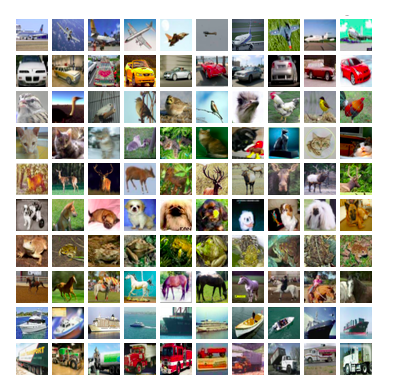

In [7]:

# Import libraries

# Loading and processing
import glob
import cv2
import py7zr

# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [61]:
# Python package to open .7z archives
!pip install py7zr;

## EDA analysis:

In [5]:
# Look for GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


### Download the DatSet from Kaggle network:


In [37]:
# 1st we need Class Labels:

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [35]:
# 
BATCH_SIZE = 128
nb_epochs = 10
VALIDATION_SPLIT = 0.2
num_classes = 10

In [34]:
# Analyse the shape of Test & Train Data:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, img_channels, img_rows, img_cols = X_test.shape

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Visualization of original DataSet:

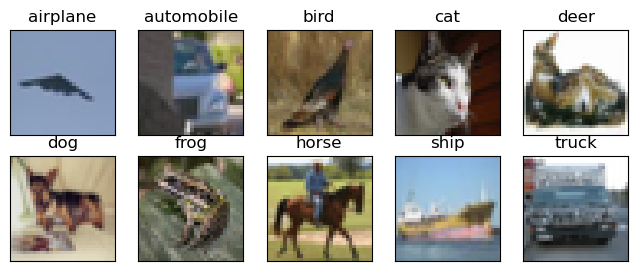

In [38]:
# Visual Analysis of Original Data:

plot = plt.figure(figsize =(8, 3))
for i in range(num_classes):
    axis = plot.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    axis = plot.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    idx = np.where(y_train[:] == i)[0]
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num,::]
    axis.set_title(class_names[i])
    plt.imshow(image)
plt.show()
     


In [39]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [40]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## A simple Convolutional Neural Network model with only one hidden layer.

## Create a Model:

In [41]:
     # Network
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    # Adding more layers to improve the model
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model


In [22]:

model = create_cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [42]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [43]:
# Train the Model:
model_images = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs,
          validation_split = VALIDATION_SPLIT, verbose = 1)


Epoch 1/10
313/313 [==============================] - 111s 353ms/step - loss: 0.7617 - accuracy: 0.7376 - val_loss: 0.7520 - val_accuracy: 0.7423
Epoch 2/10
313/313 [==============================] - 111s 355ms/step - loss: 0.7004 - accuracy: 0.7584 - val_loss: 0.7631 - val_accuracy: 0.7458
Epoch 3/10
313/313 [==============================] - 111s 355ms/step - loss: 0.6433 - accuracy: 0.7748 - val_loss: 0.6962 - val_accuracy: 0.7655
Epoch 4/10
313/313 [==============================] - 113s 362ms/step - loss: 0.6003 - accuracy: 0.7916 - val_loss: 0.6717 - val_accuracy: 0.7750
Epoch 5/10
313/313 [==============================] - 111s 354ms/step - loss: 0.5648 - accuracy: 0.7996 - val_loss: 0.6605 - val_accuracy: 0.7759
Epoch 6/10
313/313 [==============================] - 111s 354ms/step - loss: 0.5224 - accuracy: 0.8185 - val_loss: 0.6641 - val_accuracy: 0.7761
Epoch 7/10
313/313 [==============================] - 111s 354ms/step - loss: 0.4939 - accuracy: 0.8265 - val_loss: 0.6737 -

## Model evaluation:

In [44]:
print(model_images.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


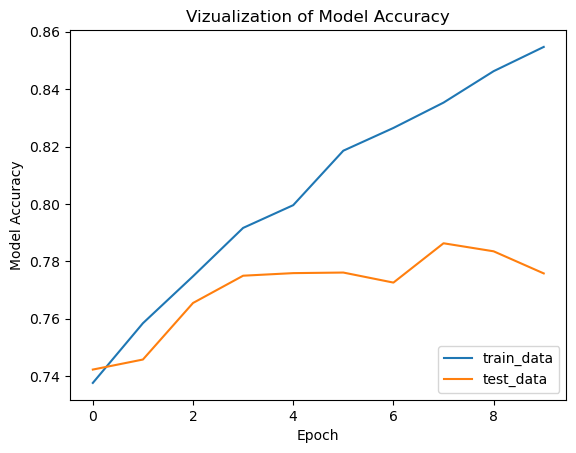

In [49]:
# Plot the output of accuracy:

plt.plot(model_images.history['accuracy'])
plt.plot(model_images.history['val_accuracy'])
plt.title("Vizualization of Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')
plt.legend(['train_data', 'test_data'], loc='lower right')
plt.show()
     




plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()
     


Also important to analyse plot of Loss function for soecific Model:

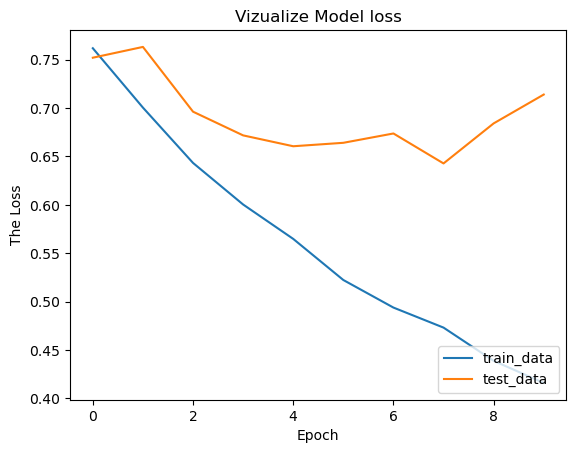

In [50]:

# # Plot the output of loss:

plt.plot(model_images.history['loss'])
plt.plot(model_images.history['val_loss'])
plt.title("Vizualize Model loss")
plt.xlabel('Epoch')
plt.ylabel('The Loss')
plt.legend(['train_data','test_data'], loc = 'lower right')
plt.show()
     


In [51]:
# To get Total score of Accuracy and Loss:
total_score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

79/79 [==============================] - 6s 70ms/step - loss: 0.7426 - accuracy: 0.7734


In [52]:
print("Test Loss", total_score[0])
print("Test accuracy", total_score[1])

Test Loss 0.7425554990768433
Test accuracy 0.7734000086784363


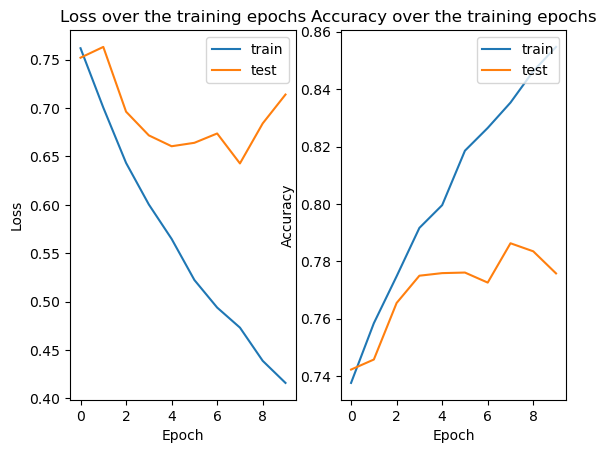

In [57]:
# Plot the evolution of training/validation error and accuracy

train_metrics = model_images.history

fig, ax = plt.subplots(1,2)
ax[0].plot(train_metrics['loss'])
ax[0].plot(train_metrics['val_loss'])
ax[0].legend(['train','test'], loc='upper right')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss over the training epochs")

ax[1].plot(train_metrics['accuracy'])
ax[1].plot(train_metrics['val_accuracy'])
ax[1].legend(['train','test'], loc='upper right')
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy over the training epochs")

plt.show()

### Experiments to make predictions:

1/1 [==============================] - 0s 149ms/step


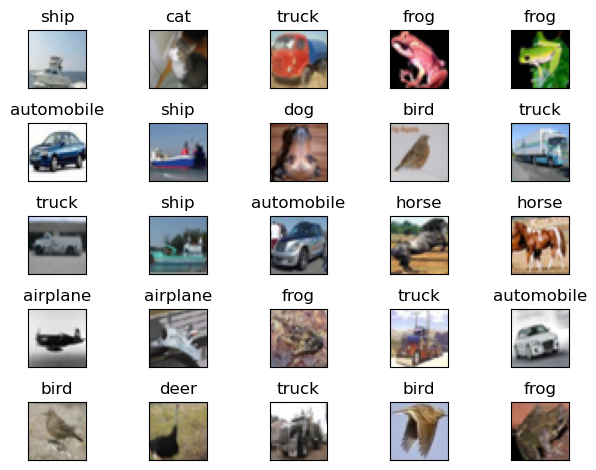

In [58]:

# Example predictions

sample_set = X_train[100:125]

sample_predictions = np.argmax(model.predict(sample_set),axis=1)

fig,axes = plt.subplots(5,5)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(sample_set[i])
  ax.set_title(f'{CLASS_NAMES[sample_predictions[i]]}')
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()



Predictions on the test set

In [ ]:
# Test set
if not len(glob.glob('/kaggle/working/test/*.png')):
    with py7zr.SevenZipFile('/kaggle/input/cifar-10/test.7z', mode='r') as z:
        z.extractall()

In [ ]:
# Test set
if not len(glob.glob('/kaggle/working/test/*.png')):
    with py7zr.SevenZipFile('/kaggle/input/cifar-10/test.7z', mode='r') as z:
        z.extractall()

In [ ]:
# Code -> classnames, and the helper function we made earlier
code_to_classname = {i:CLASS_NAMES[i] for i in range(len(CLASS_NAMES))}
def filename_to_id(filename):
    return int(filename.split('/')[-1].split('.')[0])

In [ ]:
# Form predictions
test_flow.reset()

test_output = model.predict(test_flow)
test_prediction_codes = pd.Series(np.argmax(test_output, axis=1))
test_prediction_labels = test_prediction_codes.map(code_to_classname)

test_filenames = pd.Series(test_flow.filenames)
test_ids = test_filenames.apply(filename_to_id)

In [ ]:


# Final cleaning up and output
out_df = pd.DataFrame({'id':test_ids,'label':test_prediction_labels})
out_df.sort_values(by=['id'], inplace=True)
out_df = out_df.reset_index(drop=True)
out_df = out_df.dropna()
out_df['id'] = out_df['id'].astype(int)

out_df.to_csv('/kaggle/working/submission.csv', index=False)



# Conclusion:

The accuracy of improved with time:
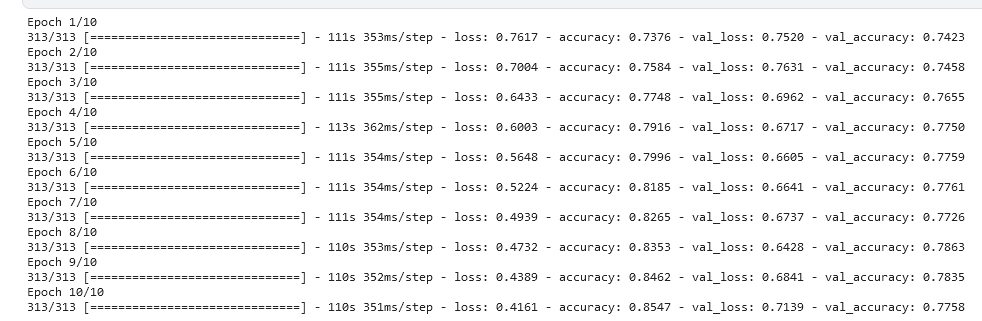